In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML
from qwanta import Experiment
import matplotlib
import seaborn as sns

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

In [8]:
# Architecture 0

def distance_to_prob(distance, time):
    p = [1, 0, 0, 0]
    return p

def adjusted_rate(rl, dl, ds, loss=0.1):
    return rl*10**((dl - ds)*loss/10)

minimal_edges_infos = [(0.0001, 100, 100), (0.0001, 175, 25), 
                       (0.0001, 150, 50) ,(0.0001, 125, 75)]
adjusted_rate_list = [adjusted_rate(*i) for i in minimal_edges_infos]

node_number = 3
n_hops = [2]
nodes_name = [f'Node {i}' for i in range(node_number)]
distance_btw = 100 # km
edges_loss = [0.1]*(node_number-1) # dB/km
loss = 0.1

nodes_info_exp = [{
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (100, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (25, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (50, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (75, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
]
bias_edge = [{
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
]

e_tl, vis_a = Experiment.read_timeline_from_csv(f'exper_ID9_2hops_1setup_ArcType0.xlsx', excel=True)
exp_names = ['Center-D100-L0_1',
             'Bias-Left_D25-L0-1',
             'Bias-Left_D50-L0-1',
             'Bias-Left_D75-L0-1']

timelines = {exp_name: e_tl for exp_name in exp_names}
nodes_information = {exp_name: nodes_info_exp[index] for index, exp_name in enumerate(exp_names)}
networks = {exp_name: bias_edge[index] for index, exp_name in enumerate(exp_names)}
mem_func = {exp_name: None for exp_name in exp_names}
sim_time = {exp_name: None for exp_name in exp_names}
labels = {exp_name: 'k' for exp_name in exp_names}

'''
timelines = {'ID9-StaticMiddleLink': e_tl, 'ID9-StaticBiasLeftLink': e_tl,'ID9-DynamicMiddleLink': e_tl,'ID9-DynamicMiddleLinkDouble': e_tl_2,'ID9-DynamicMiddleLink-inverseDirection': e_tl}
nodes_information = {'ID9-StaticMiddleLink': nodes_info_exp[0], 'ID9-StaticBiasLeftLink': nodes_info_exp[1],'ID9-DynamicMiddleLink': nodes_info_exp[2],'ID9-DynamicMiddleLinkDouble': nodes_info_exp[3],'ID9-DynamicMiddleLink-inverseDirection': nodes_info_exp[4]}
networks = {'ID9-StaticMiddleLink': edges_info_exp[0], 'ID9-StaticBiasLeftLink': edges_info_exp[1],'ID9-DynamicMiddleLink': edges_info_exp[2],'ID9-DynamicMiddleLinkDouble': edges_info_exp[3],'ID9-DynamicMiddleLink-inverseDirection': edges_info_exp[4]}
mem_func = {'ID9-StaticMiddleLink': None, 'ID9-StaticBiasLeftLink': None,'ID9-DynamicMiddleLink': None,'ID9-DynamicMiddleLinkDouble': None,'ID9-DynamicMiddleLink-inverseDirection': None}
sim_time = {'ID9-StaticMiddleLink': None, 'ID9-StaticBiasLeftLink': None,'ID9-DynamicMiddleLink': None,'ID9-DynamicMiddleLinkDouble': None,'ID9-DynamicMiddleLink-inverseDirection': None}
labels ={'ID9-StaticMiddleLink': 'k', 'ID9-StaticBiasLeftLink': 'k','ID9-DynamicMiddleLink': 'k','ID9-DynamicMiddleLinkDouble': 'k','ID9-DynamicMiddleLink-inverseDirection': 'k'}
'''


"\ntimelines = {'ID9-StaticMiddleLink': e_tl, 'ID9-StaticBiasLeftLink': e_tl,'ID9-DynamicMiddleLink': e_tl,'ID9-DynamicMiddleLinkDouble': e_tl_2,'ID9-DynamicMiddleLink-inverseDirection': e_tl}\nnodes_information = {'ID9-StaticMiddleLink': nodes_info_exp[0], 'ID9-StaticBiasLeftLink': nodes_info_exp[1],'ID9-DynamicMiddleLink': nodes_info_exp[2],'ID9-DynamicMiddleLinkDouble': nodes_info_exp[3],'ID9-DynamicMiddleLink-inverseDirection': nodes_info_exp[4]}\nnetworks = {'ID9-StaticMiddleLink': edges_info_exp[0], 'ID9-StaticBiasLeftLink': edges_info_exp[1],'ID9-DynamicMiddleLink': edges_info_exp[2],'ID9-DynamicMiddleLinkDouble': edges_info_exp[3],'ID9-DynamicMiddleLink-inverseDirection': edges_info_exp[4]}\nmem_func = {'ID9-StaticMiddleLink': None, 'ID9-StaticBiasLeftLink': None,'ID9-DynamicMiddleLink': None,'ID9-DynamicMiddleLinkDouble': None,'ID9-DynamicMiddleLink-inverseDirection': None}\nsim_time = {'ID9-StaticMiddleLink': None, 'ID9-StaticBiasLeftLink': None,'ID9-DynamicMiddleLink': None,

In [9]:
vis_a

Main Process                     Edges Num Trials  \
0  GeneratePhysicalResource          [Node 0, Node 1]       True   
1  GeneratePhysicalResource          [Node 1, Node 2]       True   
2   GenerateLogicalResource          [Node 0, Node 1]       True   
3   GenerateLogicalResource          [Node 1, Node 2]       True   
4      EntanglementSwapping  [Node 0, Node 1, Node 2]       True   
5           StateTomography          [Node 0, Node 2]       9000   

         Label in       Label out Resource Type        Protocol  
0  Physical Qubit        Physical           NaN             NaN  
1  Physical Qubit        Physical           NaN             NaN  
2        Physical         Logical      Physical  Non-local CNOT  
3        Physical         Logical      Physical  Non-local CNOT  
4         Logical               k       Logical             NaN  
5               k  Physical Qubit       Logical             NaN

In [10]:
p = [1]
exper_architecture0 = Experiment(networks, timelines, nodes_info=nodes_information, memFunc=mem_func, simTime=sim_time,
                 photon_channel=p, collect_fidelity_history=False, repeat=10,
                 label_records=labels,path='exp_ID9', message_log='exp_ID9_ArcType0_type_b', progress_bar=True)
exper_architecture0.run()

Experiments executed:   0%|          | 0/4 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# AWTPQ = Average waiting time of each physical qubit encoded to logical qubit
col_name = {'AWTPQ ', 'Node', 'index', 'Experiment'}
experiemnt_results = exper_architecture0.results()
data_list = []
for exp_num, exp_name in enumerate(exp_names):
    for index in range(9000):
        all_mean_qubit_wt_left, all_mean_qubit_wt_right, time = [], [], []
        for repeat in range(10):
            qubits_left = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 0']
            qubits_right = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 2']

            mean_qubit_wt_left, mean_qubit_wt_right = np.mean(qubits_left), np.mean(qubits_right)
            all_mean_qubit_wt_left.append(mean_qubit_wt_left)
            all_mean_qubit_wt_right.append(mean_qubit_wt_right)
            time.append(experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Time'])

        all_mean_time = np.mean(time)
        all_std_time = np.std(time)
        all_mean_left, all_mean_right = np.mean(all_mean_qubit_wt_left), np.mean(all_mean_qubit_wt_right)
        tmp_left = {'Experiment':exp_name, 'AWTPQ': all_mean_left, 'Node': 'Node 0', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        tmp_right = {'Experiment':exp_name, 'AWTPQ': all_mean_right, 'Node': 'Node 2', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        data_list.append(tmp_left)
        data_list.append(tmp_right)

dataset_architecture0 = pd.DataFrame(data_list)
dataset_architecture0

Experiment     AWTPQ    Node  index        Time       STD
0        Center-D100-L0_1  0.009533  Node 0      0    0.053067  0.009315
1        Center-D100-L0_1  0.005533  Node 2      0    0.053067  0.009315
2        Center-D100-L0_1  0.020267  Node 0      1    0.104867  0.015100
3        Center-D100-L0_1  0.008200  Node 2      1    0.104867  0.015100
4        Center-D100-L0_1  0.023200  Node 0      2    0.158667  0.018494
...                   ...       ...     ...    ...         ...       ...
71995  Bias-Left_D75-L0-1  0.001250  Node 2   8997  932.386417  2.068446
71996  Bias-Left_D75-L0-1  0.216083  Node 0   8998  932.505250  2.074539
71997  Bias-Left_D75-L0-1  0.001250  Node 2   8998  932.505250  2.074539
71998  Bias-Left_D75-L0-1  0.219750  Node 0   8999  932.606167  2.076868
71999  Bias-Left_D75-L0-1  0.001250  Node 2   8999  932.606167  2.076868

[72000 rows x 6 columns]

In [12]:
df = dataset_architecture0
arc = ['Architecture 0']*len(df)
df['Architecture'] = arc
df.to_csv('exp_id9/exp_id9_arch0_b_results_df.csv')

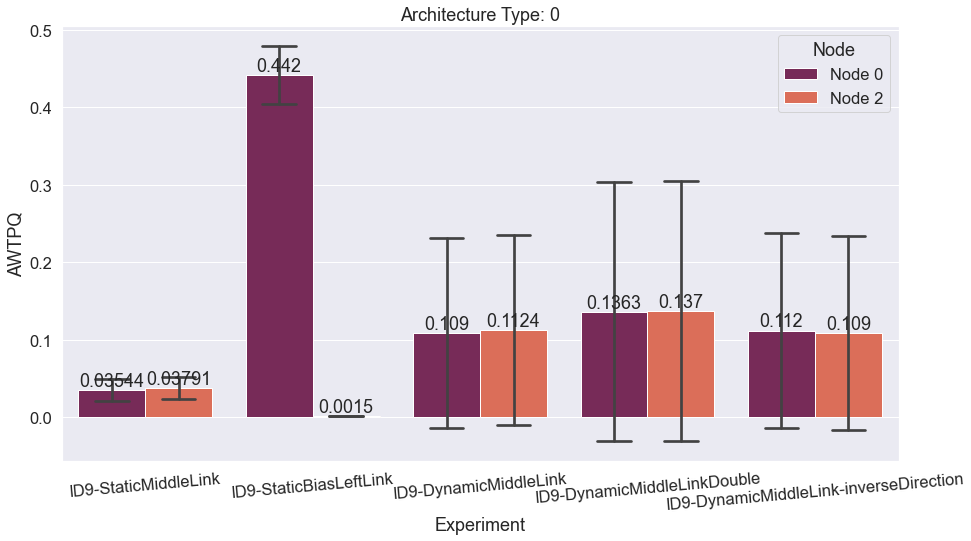

In [75]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
ax = sns.barplot(data=dataset_architecture0, x='Experiment', y='AWTPQ', hue='Node', ci='sd',palette="rocket", capsize=0.2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 5)
#ax.set_ylim(0, 0.02)
ax.set_title('Architecture Type: 0')
plt.savefig('exp_id9/exp_id9_architype0_loss_10repeated.png')

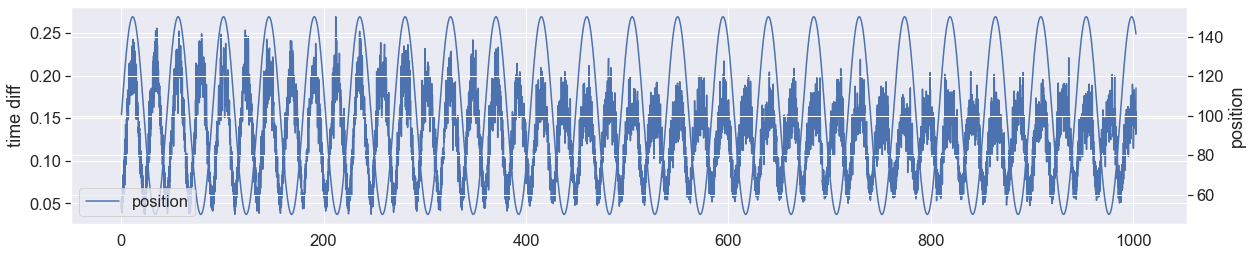

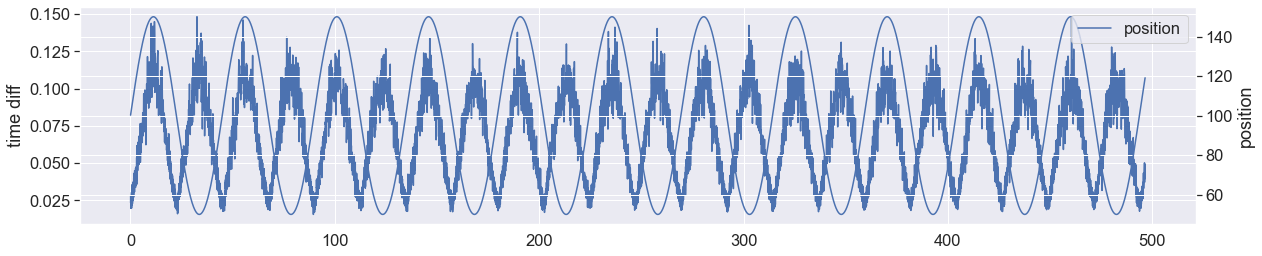

In [72]:
df = dataset_architecture0

for name in ['ID9-DynamicMiddleLink', 'ID9-DynamicMiddleLinkDouble']: # exp_names
    time_stamp = np.array(df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].to_list())
    coordinate_x = time_to_coordinate(time_stamp)[0]
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    fig,ax = plt.subplots(figsize = (20,4))
    ax.plot(time_stamp[1:], time_diff_list.to_list()[1:], label='time diff')
    ax.set_ylabel('time diff')
    ax2=ax.twinx()
    ax2.plot(time_stamp, coordinate_x, label='position')
    ax2.set_ylabel('position')
    plt.legend()

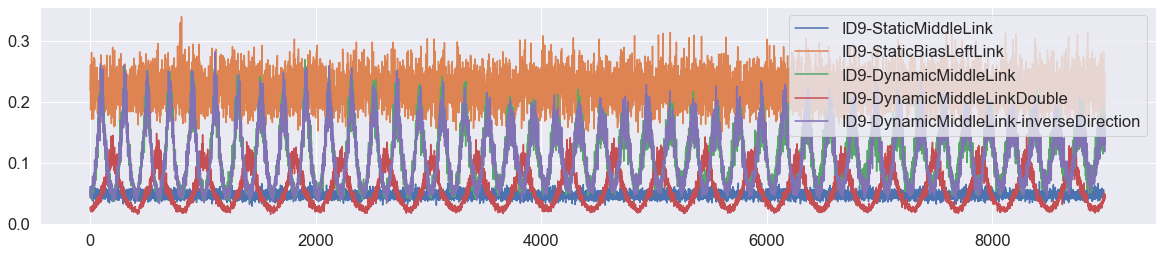

In [77]:
df = dataset_architecture0
plt.figure(figsize = (20,4))
for name in exp_names:
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    
    plt.plot(time_diff_list.to_list()[1:], label=name)
plt.legend()
plt.savefig('exp_id9/exp_id9_architype0_time_diff_loss_10repeated.png')

In [29]:
df = dataset_architecture0
dummy = []
for name in exp_names:
    first_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['Time']
    first_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['STD']
    last_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['Time']
    last_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['STD']
    #print(f'{name}: first: {first_mean} STD: {first_std}, last: {last_mean} STD: {last_std}')
    dummy.append([first_mean, first_std, last_mean, last_std])
    #print(f'{first_mean}\t{first_std}\t{last_mean}\t{last_std}')
np.savetxt('exp_id9/exp_id9_a0_loss.csv', np.array(dummy), delimiter=",")

In [30]:
arc = ['Architecture 0']*len(df)
df['Architecture'] = arc
df.to_csv('exp_id9/exp_id9_arch0_b_results_df.csv')